<a href="https://colab.research.google.com/github/SHAIKYASIR/Current-Daily-Price-of-Various-Commodities-from-Various-Markets-/blob/main/T3_CLUSTERRING.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd

# Load the CSV file
file_path = '/content/drive/MyDrive/CNN/Current Daily Price of Various Commodities from Various Markets.csv'
data = pd.read_csv(file_path)

# Rename columns to more user-friendly names
data.rename(columns={
    'Min_x0020_Price': 'Min_Price',
    'Max_x0020_Price': 'Max_Price',
    'Modal_x0020_Price': 'Modal_Price'
}, inplace=True)

# Convert Arrival_Date to datetime format
data['Arrival_Date'] = pd.to_datetime(data['Arrival_Date'], format='%d/%m/%Y')

#The first few rows after preprocessing
print(data.head())


            State       District       Market            Commodity  \
0  Andhra Pradesh  East Godavari  Rajahmundry  Paddy(Dhan)(Common)   
1  Andhra Pradesh        Kurnool      Kurnool          Castor Seed   
2  Andhra Pradesh        Kurnool   Pattikonda                Onion   
3           Bihar          Buxar     Brahmpur               Potato   
4           Bihar          Jamui        Jamui               Potato   

               Variety Grade Arrival_Date  Min_Price  Max_Price  Modal_Price  
0  Swarna Masuri (New)   FAQ   2024-07-20       2320     2320.0       2320.0  
1                Other   FAQ   2024-07-20       5642     5642.0       5642.0  
2                Local   FAQ   2024-07-20       4500     5000.0       4800.0  
3                Jyoti   FAQ   2024-07-20       2000     3000.0       2500.0  
4                Jyoti   FAQ   2024-07-20       2600     2700.0       2700.0  


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

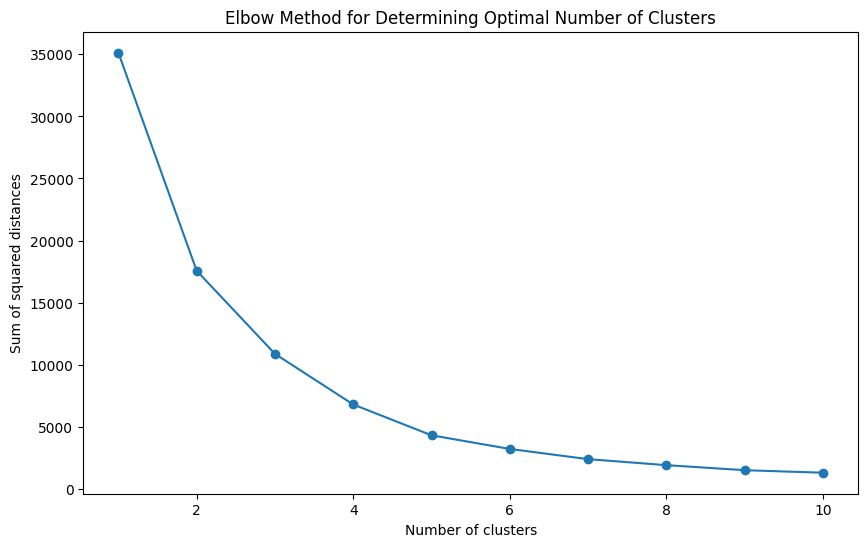

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


            State       District                   Market  \
0  Andhra Pradesh  East Godavari              Rajahmundry   
1  Andhra Pradesh        Kurnool                  Kurnool   
2  Andhra Pradesh        Kurnool               Pattikonda   
3           Bihar          Buxar                 Brahmpur   
4           Bihar          Jamui                    Jamui   
5      Chandigarh     Chandigarh  Chandigarh(Grain/Fruit)   
6      Chandigarh     Chandigarh  Chandigarh(Grain/Fruit)   
7      Chandigarh     Chandigarh  Chandigarh(Grain/Fruit)   
8     Chattisgarh       Bilaspur                   Tiphra   
9     Chattisgarh       Bilaspur                   Tiphra   

             Commodity              Variety   Grade Arrival_Date  Min_Price  \
0  Paddy(Dhan)(Common)  Swarna Masuri (New)     FAQ   2024-07-20       2320   
1          Castor Seed                Other     FAQ   2024-07-20       5642   
2                Onion                Local     FAQ   2024-07-20       4500   
3           

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Select numerical features for clustering
features = data[['Min_Price', 'Max_Price', 'Modal_Price']]

# Normalize the data
scaler = StandardScaler()
normalized_features = scaler.fit_transform(features)

# Determining the optimal number of clusters using the elbow method
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(normalized_features)
    sse.append(kmeans.inertia_)

# Plot the elbow curve
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), sse, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Sum of squared distances')
plt.title('Elbow Method for Determining Optimal Number of Clusters')
plt.show()

# Train the K-Means model with the optimal number of clusters
optimal_clusters = 4  # Replace this with the number of clusters determined from the elbow plot
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
data['Cluster'] = kmeans.fit_predict(normalized_features)

# Display the first few rows of the dataset with cluster labels
print(data.head(10))


In [4]:
!jupyter nbconvert --to html S.YASIR-CLASSIFICATION-T2.ipynb

[NbConvertApp] Converting notebook S.YASIR-CLASSIFICATION-T2.ipynb to html
[NbConvertApp] Writing 632429 bytes to S.YASIR-CLASSIFICATION-T2.html


In [5]:
!jupyter nbconvert --to html S.YASIR-CLUSTERING-T3.ipynb

[NbConvertApp] Converting notebook S.YASIR-CLUSTERING-T3.ipynb to html
[NbConvertApp] Writing 640873 bytes to S.YASIR-CLUSTERING-T3.html
